In [178]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', None)

import os

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# cow_id vs lactation_number?
# remark, r, t, b???
columns = ['cow_id', 'lactation_number', 'event', 'days_in_milk', 'date', 'remark', 'r', 't', 'b']

breedings = pd.read_csv(
    'sample/breedings.csv',
    header=0,
    names=columns,
    converters={'event': lambda x: x.strip(), 
                'date': lambda x: pd.to_datetime(x, errors='coerce'), 
                'remark': lambda x: x.strip(), 
                'r': lambda x: x.strip(), 
                'b': lambda x: x.strip()})

breedings = breedings.sort_values(by=['date'])
breedings

,cow_id,lactation_number,event,days_in_milk,date,remark,r,t,b
1290,11054,1,BRED,57,2018-03-01,14H13976,P,7,F
483,8150,4,BRED,104,2018-03-01,7H13844,O,7,F
1944,11801,0,BRED,454,2018-03-01,507H12111,O,6,A
1968,11831,0,BRED,443,2018-03-01,507H12111,O,6,A
383,6518,1,BRED,87,2018-03-01,7H12256,P,7,F
...,...,...,...,...,...,...,...,...,...
4689,13407,0,BRED,449,2019-12-30,7H14330,P,11,F
4727,13438,0,BRED,439,2019-12-30,507H14451,O,11,F
1909,11741,2,BRED,70,2019-12-31,14H14881,O,4,F
1870,11687,2,BRED,90,2019-12-31,7H14879,P,4,F


In [4]:
# data_entry = (cow_id, lactation_number, calving_date, event)

calves_dict = dict()
for index, row in breedings.iterrows():
    calving_date = row.date - pd.Timedelta(days=row.days_in_milk)
    entry = (row.cow_id, row.lactation_number, calving_date, row.event)
    info = {'days_in_milk': row.days_in_milk, 'date': row.date, 'remark': row.remark, 'r': row.r, 't': row.t, 'b': row.b}
    if entry in calves_dict:
        # this cow has already been born, update entry
        log = calves_dict[entry]
        # check for errors
        assert log[-1]['days_in_milk'] <= info['days_in_milk'] and log[-1]['date'] <= info['date']
        log.append(info)
    else:
        # calf was born 
        calves_dict[entry] = [info]

In [5]:
calves = pd.DataFrame(data=calves_dict.keys(), columns=['cow_id', 'lactation_number', 'calving_date', 'event'])
calves = calves.sort_values(by=['cow_id'])
calves.to_csv('sample cleaned/breedings.csv', index=False)
calves

,cow_id,lactation_number,calving_date,event
799,1,3,2018-06-04,BRED
2243,1,4,2019-06-09,BRED
787,2,2,2018-06-04,BRED
934,4,2,2018-07-08,BRED
2168,6,2,2019-01-01,BRED
...,...,...,...,...
2661,13528,0,2018-11-25,BRED
2644,13536,0,2018-11-26,BRED
2665,13537,0,2018-11-27,BRED
2654,13560,0,2018-12-05,BRED


In [6]:
data = pd.DataFrame()

for file_name in os.listdir('sample/'):
    if file_name != 'breedings.csv' and file_name.split('.')[1] == 'csv':
        data = data.append(pd.read_csv('sample/' + file_name))

In [7]:
# ??: 'act_heat_index', 'act_heat_index_smart', 'heat_index', 'temp_dec_index', 'temp_height_index', 'temp_inc_index'
data.columns = ['act_heat_index', 'act_heat_index_smart', 'activity', 'heat_index', 'activity_1day_avg', '60percentile_of_5day_temp', 'temp', 'temp_dec_index', 'temp_height_index', 'temp_inc_index', 'temp_without_drink_cycles', 'time', 'cow_id']

data.time = pd.to_datetime(data.time, errors='coerce')

data

,act_heat_index,act_heat_index_smart,activity,heat_index,activity_1day_avg,60percentile_of_5day_temp,temp,temp_dec_index,temp_height_index,temp_inc_index,temp_without_drink_cycles,time,cow_id
0,NaN,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-09 14:08:00,9992
1,NaN,NaN,0.780,NaN,0.476,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-09 14:18:00,9992
2,NaN,NaN,0.000,NaN,0.317,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-09 14:28:00,9992
3,NaN,NaN,0.030,NaN,0.256,NaN,NaN,NaN,NaN,NaN,11.92,2018-11-09 14:38:00,9992
4,NaN,NaN,0.000,NaN,0.205,NaN,NaN,NaN,NaN,NaN,12.02,2018-11-09 14:48:00,9992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69373,NaN,NaN,5.039,NaN,NaN,39.4,39.098,NaN,-0.299,0.233,39.10,2020-02-05 10:57:00,10666
69374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2020-02-05 11:00:00,10666
69375,NaN,NaN,3.989,NaN,NaN,39.4,39.098,NaN,-0.299,0.217,39.10,2020-02-05 11:07:00,10666
69376,NaN,NaN,4.729,NaN,NaN,39.4,39.068,NaN,-0.299,0.200,39.10,2020-02-05 11:17:00,10666


In [8]:
# it looks like there's additional rows added with missing data
# aka rows beyond the 10 minute intervals - so remove them
# temp_dec_index = data[data.activity_1day_avg.isnull()]
data = data[~data.activity_1day_avg.isnull()]

In [9]:
print(len(data))
print(set(data.cow_id))

455921
{10785, 10787, 9992, 9993, 9994, 9995, 10, 9997, 10666, 9975}


In [10]:
# heat_index, temp always empty
# activity, activity_1day_avg, time, cow_id always good
print(data.isnull().sum() / len(data))

act_heat_index               0.458522
act_heat_index_smart         0.471917
activity                     0.000000
heat_index                   1.000000
activity_1day_avg            0.000000
60percentile_of_5day_temp    0.013825
temp                         0.934548
temp_dec_index               0.999925
temp_height_index            0.013825
temp_inc_index               0.007861
temp_without_drink_cycles    0.000059
time                         0.000000
cow_id                       0.000000
dtype: float64


In [11]:
data = data.drop(['heat_index', 'temp', 'temp_dec_index', 'act_heat_index'], axis=1)
# temp_dec_index = temp_dec_index[['temp_dec_index', 'time', 'cow_id']]

In [12]:
# smoothing
data.temp_without_drink_cycles = data.temp_without_drink_cycles.rolling(12*6, min_periods=1, center=True).mean()
data.activity = data.activity.rolling(24*6, min_periods=1, center=True).mean()
data.activity_1day_avg = data.activity_1day_avg.rolling(24*6, min_periods=1, center=True).mean()
data.temp_height_index = data.temp_height_index.rolling(12*6, min_periods=1, center=True).mean()
data.act_heat_index_smart = data.act_heat_index_smart.rolling(24*6, min_periods=1, center=True).mean()

# scaling to a max height of 10
# temp_dec_index.temp_dec_index = temp_dec_index.temp_dec_index / (temp_dec_index.temp_dec_index.max() - temp_dec_index.temp_dec_index.min()) * 10
data.temp_without_drink_cycles = data.temp_without_drink_cycles / (data.temp_without_drink_cycles.max() - data.temp_without_drink_cycles.min()) * 10
data['60percentile_of_5day_temp'] = data['60percentile_of_5day_temp'] / (data['60percentile_of_5day_temp'].max() - data['60percentile_of_5day_temp'].min()) * 10
data.temp_height_index = data.temp_height_index / (data.temp_height_index.max() - data.temp_height_index.min()) * 10
data.temp_inc_index = data.temp_inc_index / (data.temp_inc_index.max() - data.temp_inc_index.min()) * 10
data.activity_1day_avg = data.activity_1day_avg / (data.activity_1day_avg.max() - data.activity_1day_avg.min()) * 10
data.activity = data.activity / (data.activity.max() - data.activity.min()) * 10
data.act_heat_index_smart = data.act_heat_index_smart / (data.act_heat_index_smart.max() - data.act_heat_index_smart.min()) * 10

In [13]:
cows = dict()
for cow in set(data.cow_id):
#     cows[cow] = {'df': data[data.cow_id == cow].reset_index(), 'temp_dec_index': temp_dec_index[temp_dec_index.cow_id == cow].reset_index()}
    cows[cow] = data[data.cow_id == cow].reset_index()

In [29]:
def plot_data(df, cow_id):
    ax = plt.gca()
    
    df = df.copy()
#     avgs = avgs.copy()

    '''
        # shifting so we can see all of them (not necessary later)
        df['60percentile_of_5day_temp'] -= 250
        df.temp_without_drink_cycles -= 40
        df.temp_inc_index += 20
    #     avgs.temp_dec_index += 30
        df.act_heat_index_smart += 45
        df.activity_1day_avg += 3
        df.activity -= 20
    '''

    # graphing
    dates = (min(df.time), max(df.time))
    df.plot(kind='line', x='time', y='temp_without_drink_cycles', ax=ax, figsize=(30, 10), xticks=np.arange(dates[0], dates[1], pd.Timedelta(days=21)))
#     df.plot(kind='line', x='time', y='60percentile_of_5day_temp', ax=ax)
#     df.plot(kind='line', x='time', y='temp_height_index', ax=ax)
#     df.plot(kind='line', x='time', y='temp_inc_index', ax=ax)
#     df.plot(kind='line', x='time', y='activity_1day_avg', ax=ax)
    df.plot(kind='line', x='time', y='activity', ax=ax)
#     df.plot(kind='line', x='time', y='act_heat_index_smart', ax=ax)
#     avgs.plot(kind='line', x='time', y='temp_dec_index', ax=ax)
    
    # pregnancy
    for date in calves[calves.cow_id == cow_id].calving_date:
        pregnancy = (date - pd.Timedelta(days=283), date)
        if pregnancy[1] > dates[0] and pregnancy[0] < dates[1]:
            ax.axvspan(pregnancy[0], pregnancy[1], color='purple', alpha=0.25)

    plt.show()

10785


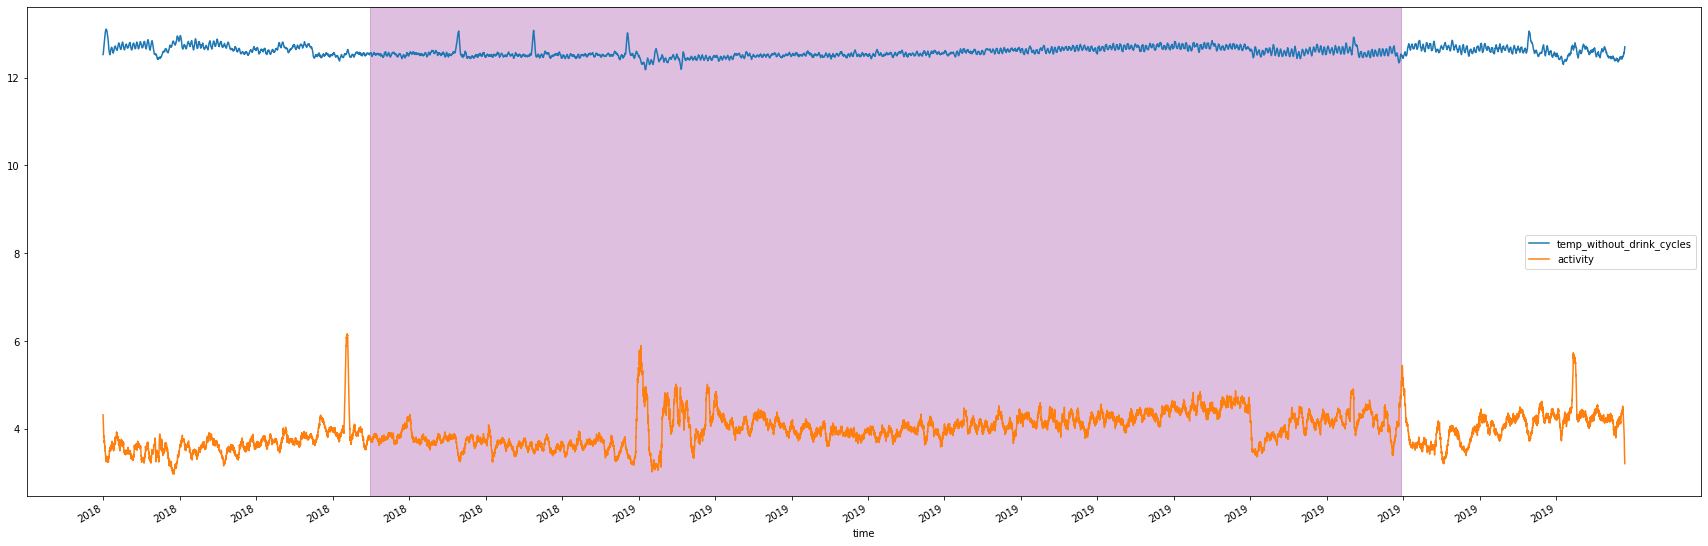

10787


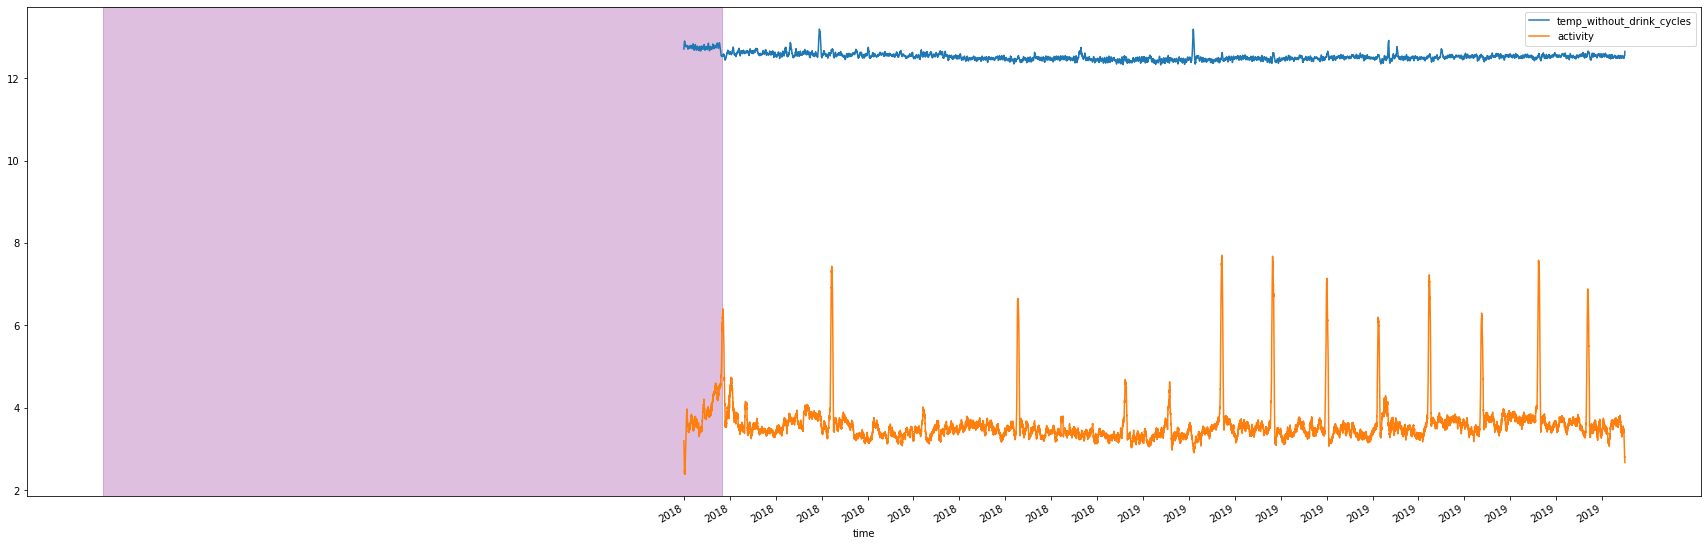

9992


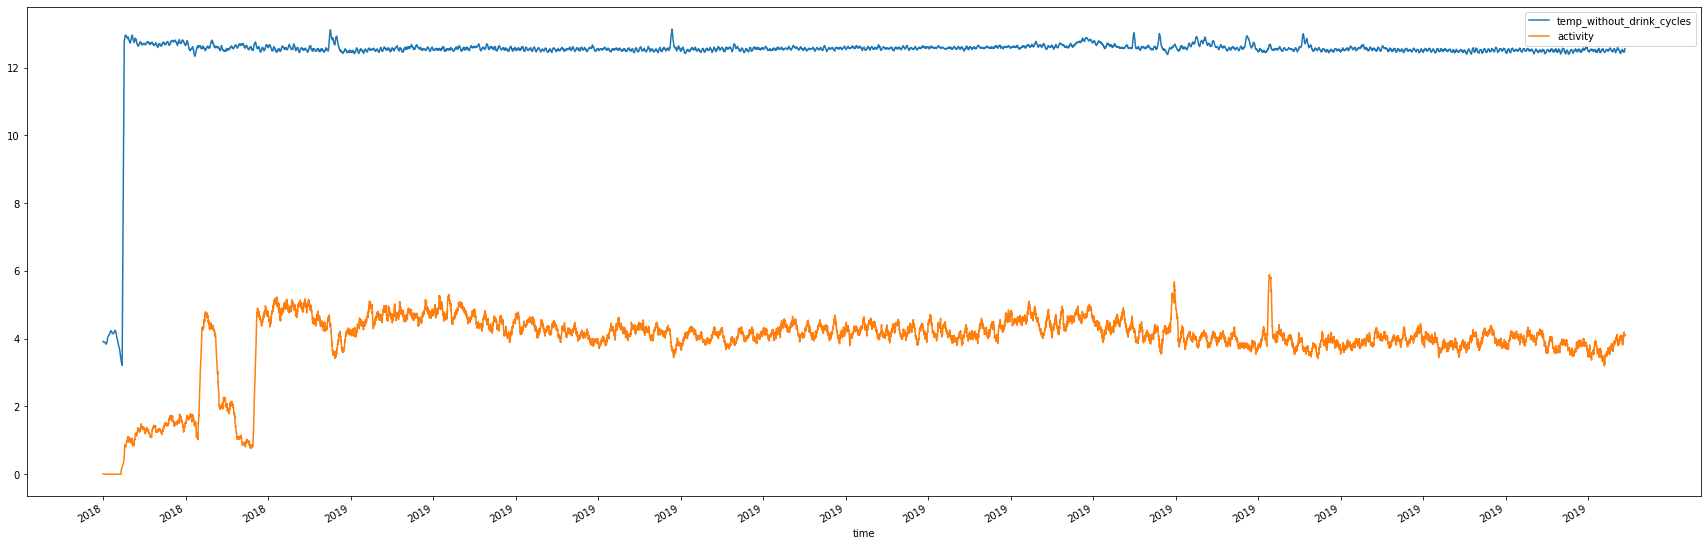

9993


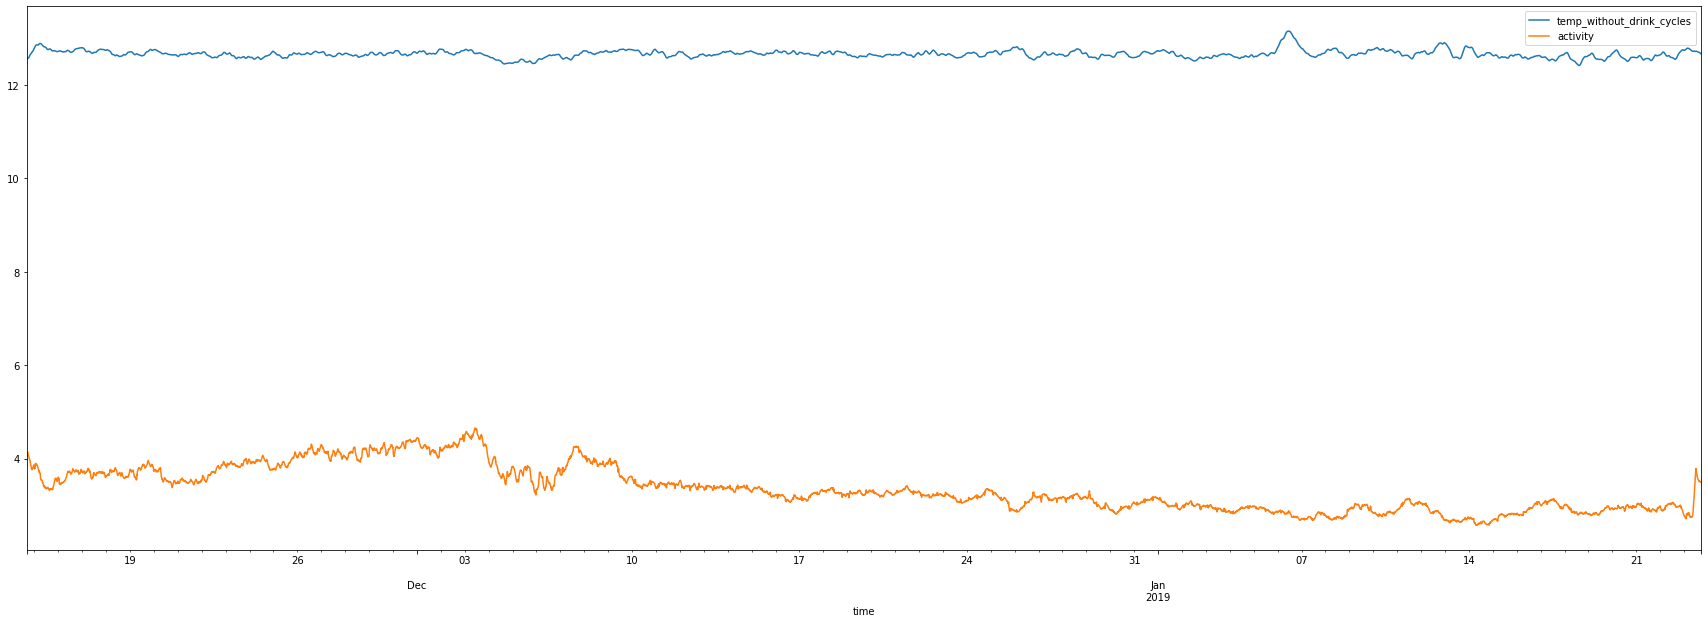

9994


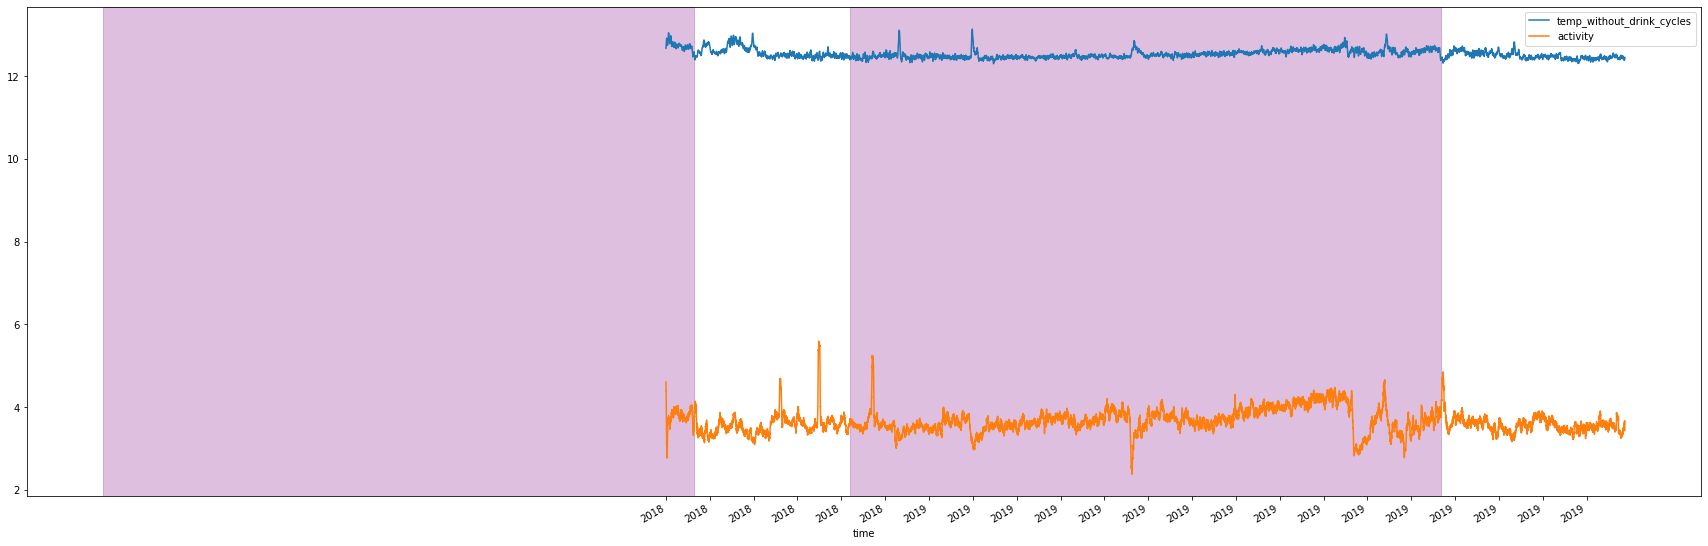

9995


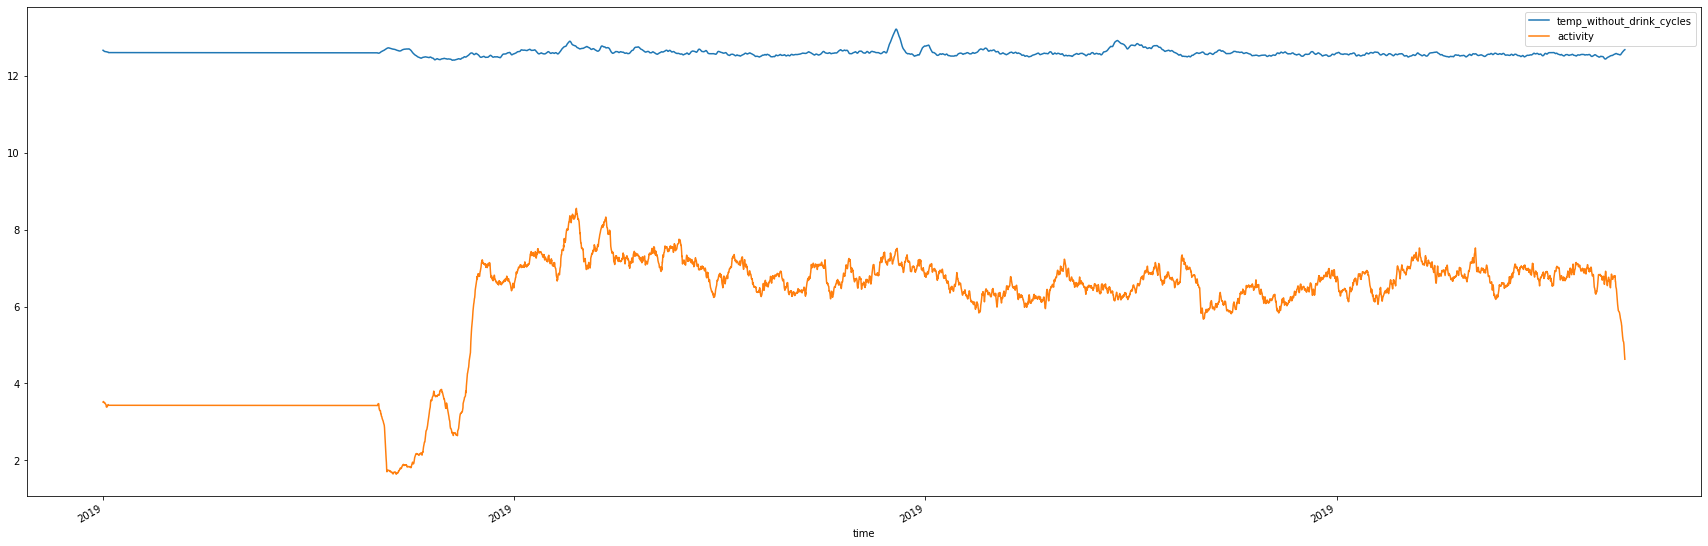

10


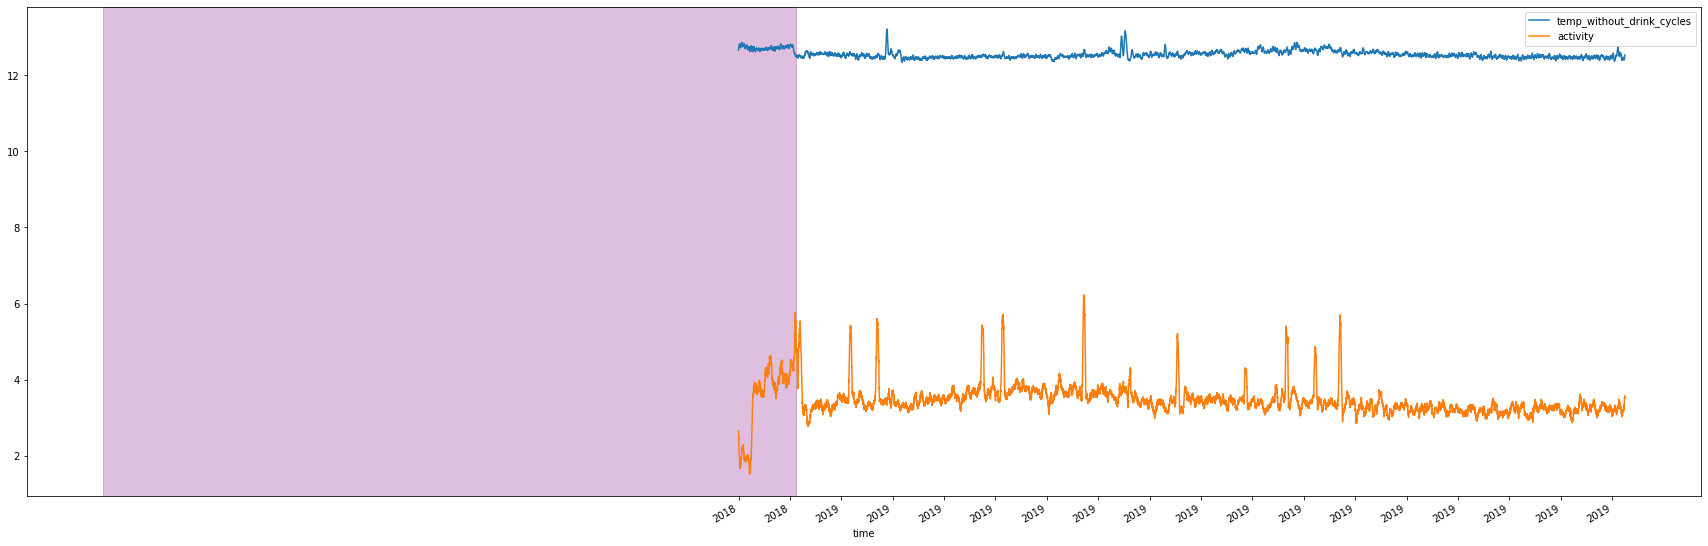

9997


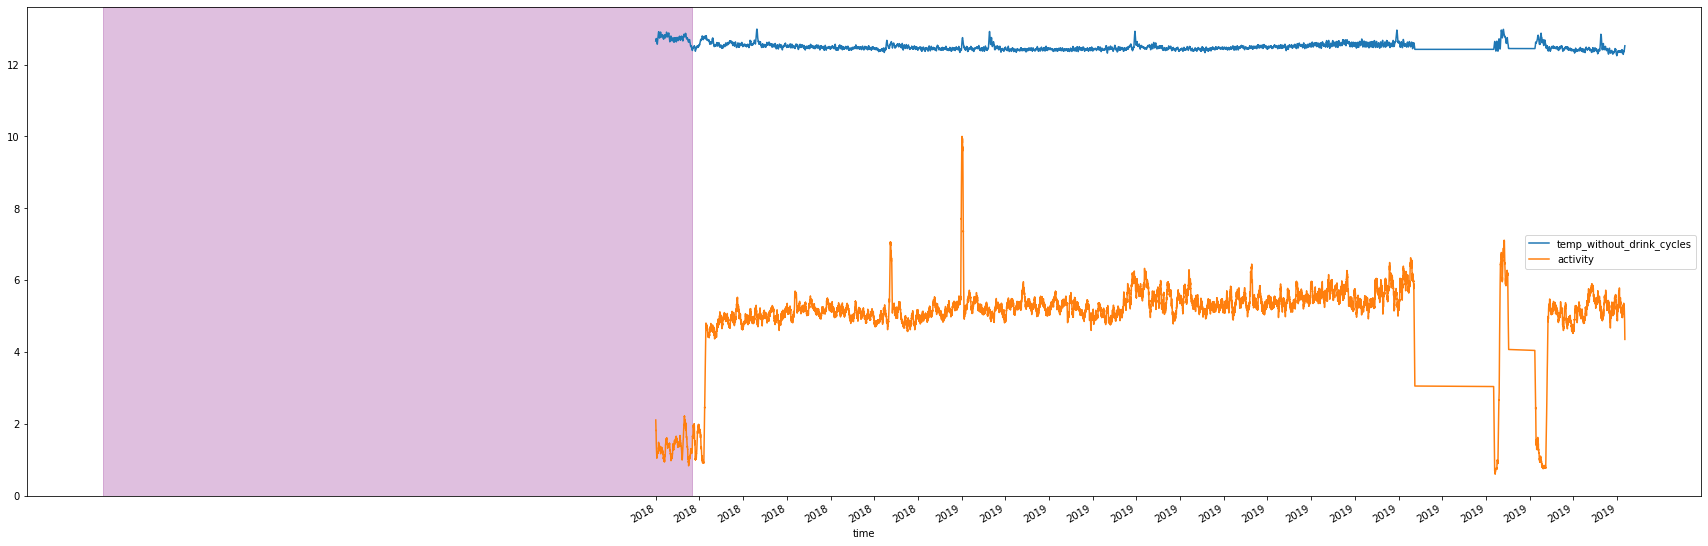

10666


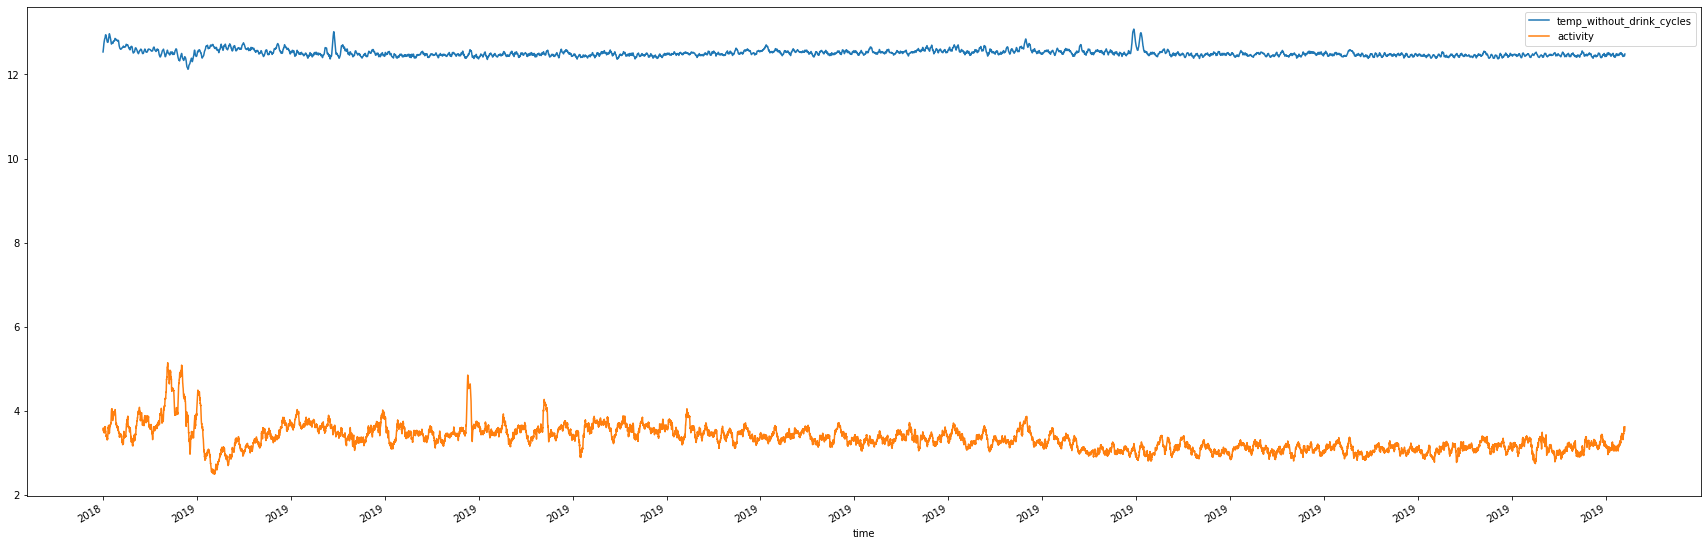

9975


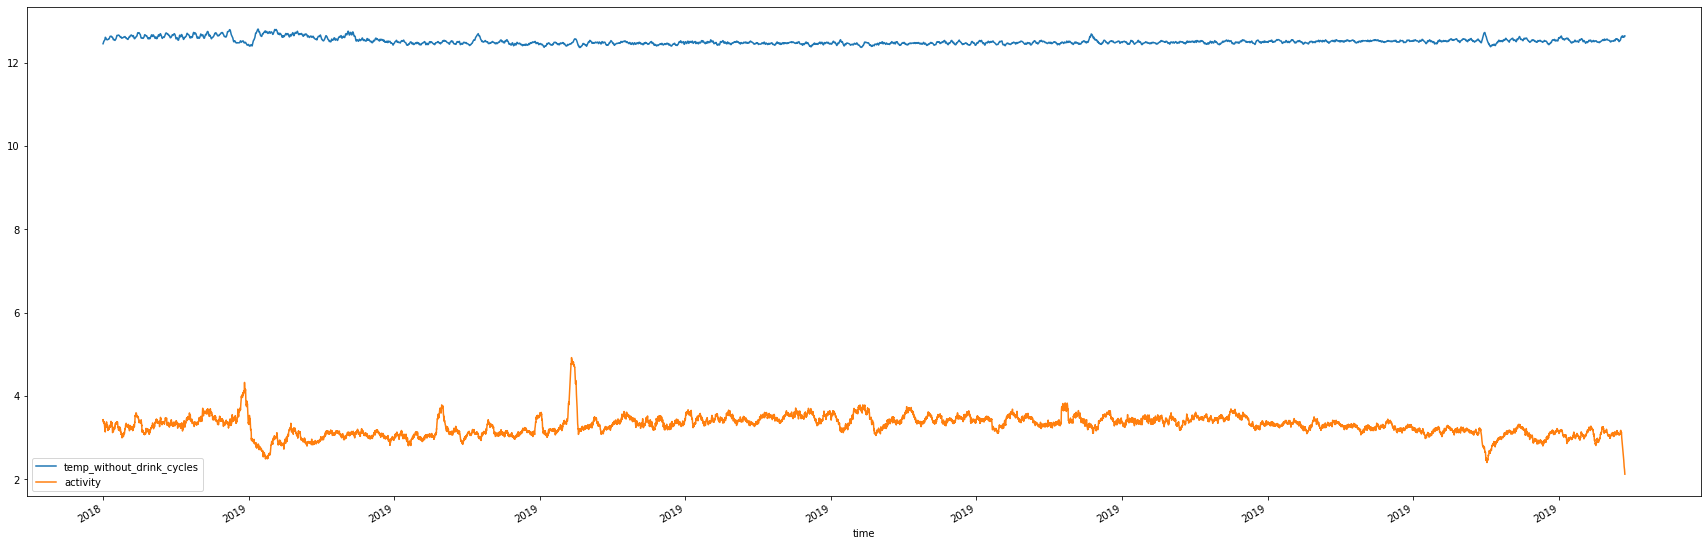

In [30]:
for cow in cows.keys():
#     plot_data(cows[cow]['df'], cows[cow]['temp_dec_index'])
    print(cow)
    plot_data(cows[cow], cow)

In [91]:
for cow in cows.keys():
    cows[cow].to_csv('sample cleaned/' + str(cow) + '.csv', index=False)

In [194]:
def plot(df, cow_id, z=None):
    ax = plt.gca()
    
    # graphing
    dates = (min(df.time), max(df.time))
    df.plot(kind='line', x='time', y='temp_without_drink_cycles', ax=ax, figsize=(30, 10), xticks=np.arange(dates[0], dates[1], pd.Timedelta(days=21)))
    df.plot(kind='line', x='time', y='activity', ax=ax)
    
    # pregnancy
    for date in calves[calves.cow_id == cow_id].calving_date:
        pregnancy = (date - pd.Timedelta(days=283), date)
        if pregnancy[1] > dates[0] and pregnancy[0] < dates[1]:
            ax.axvspan(pregnancy[0], pregnancy[1], color='purple', alpha=0.25)

    if z is not None:
        for x in z:
            ax.axvline(df.time[x], color='red')
            
    plt.show()

10785


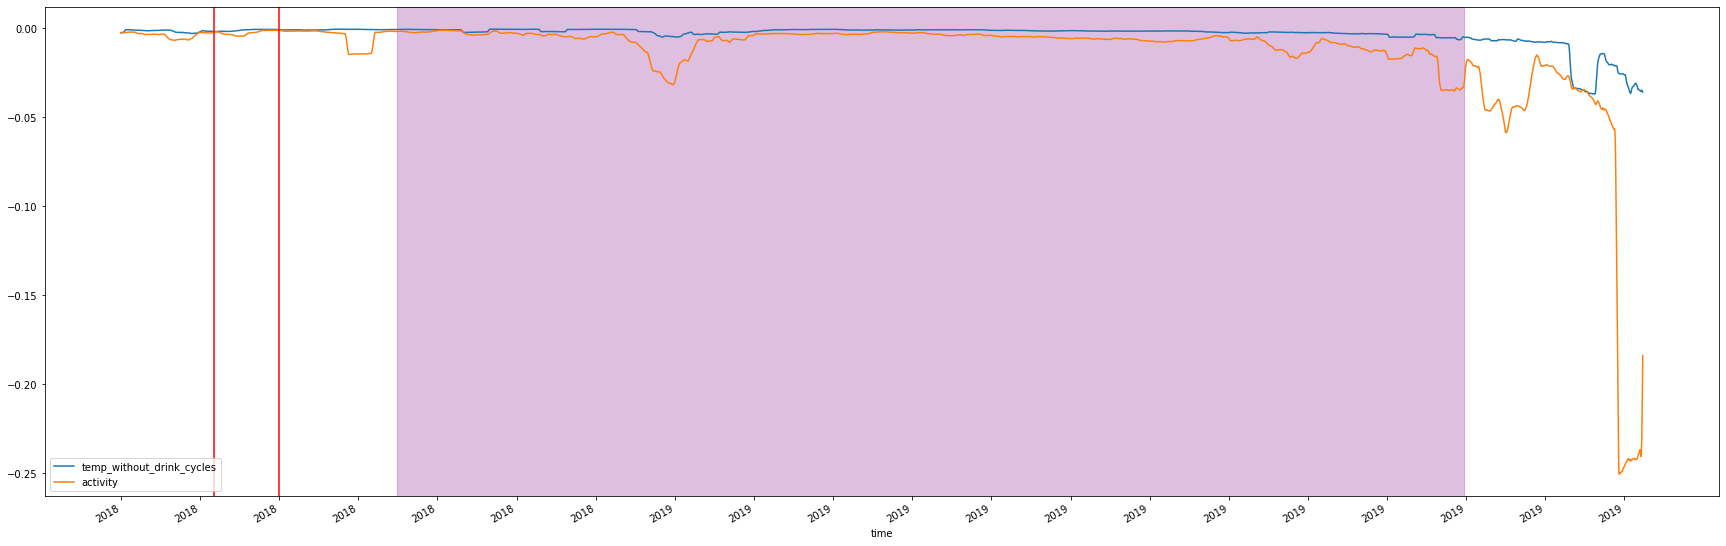

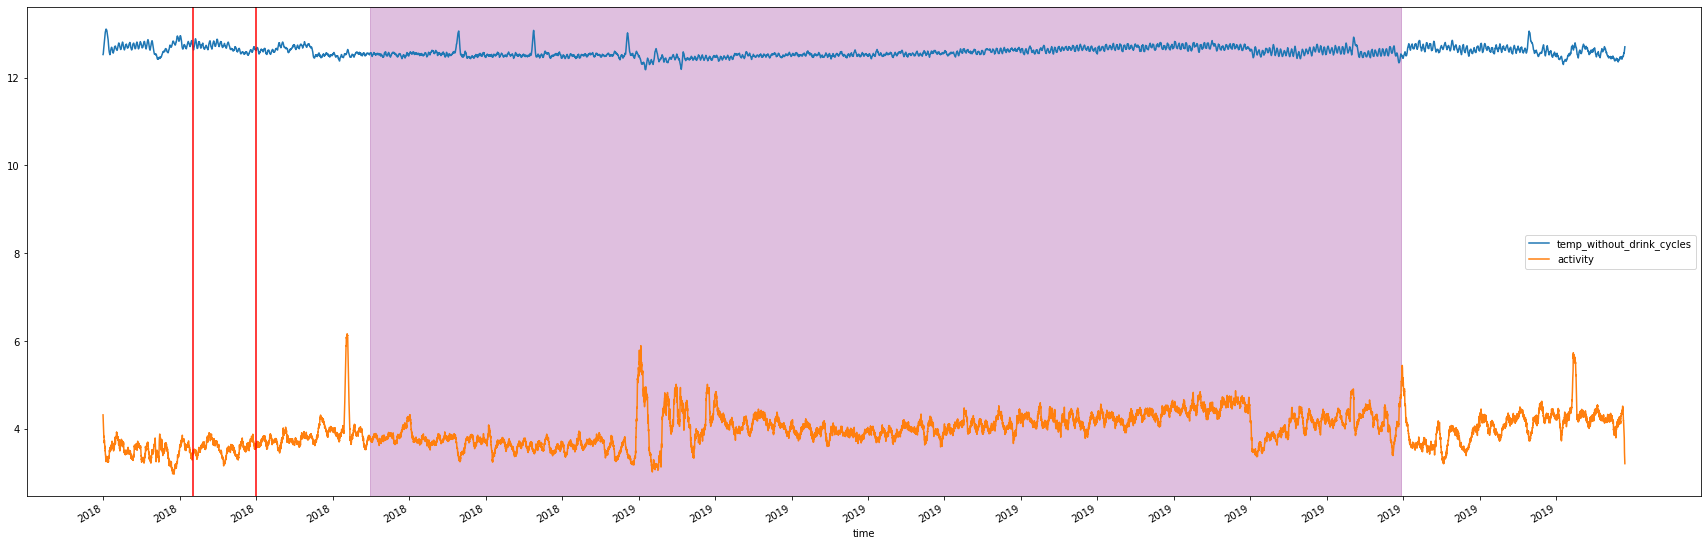

10787


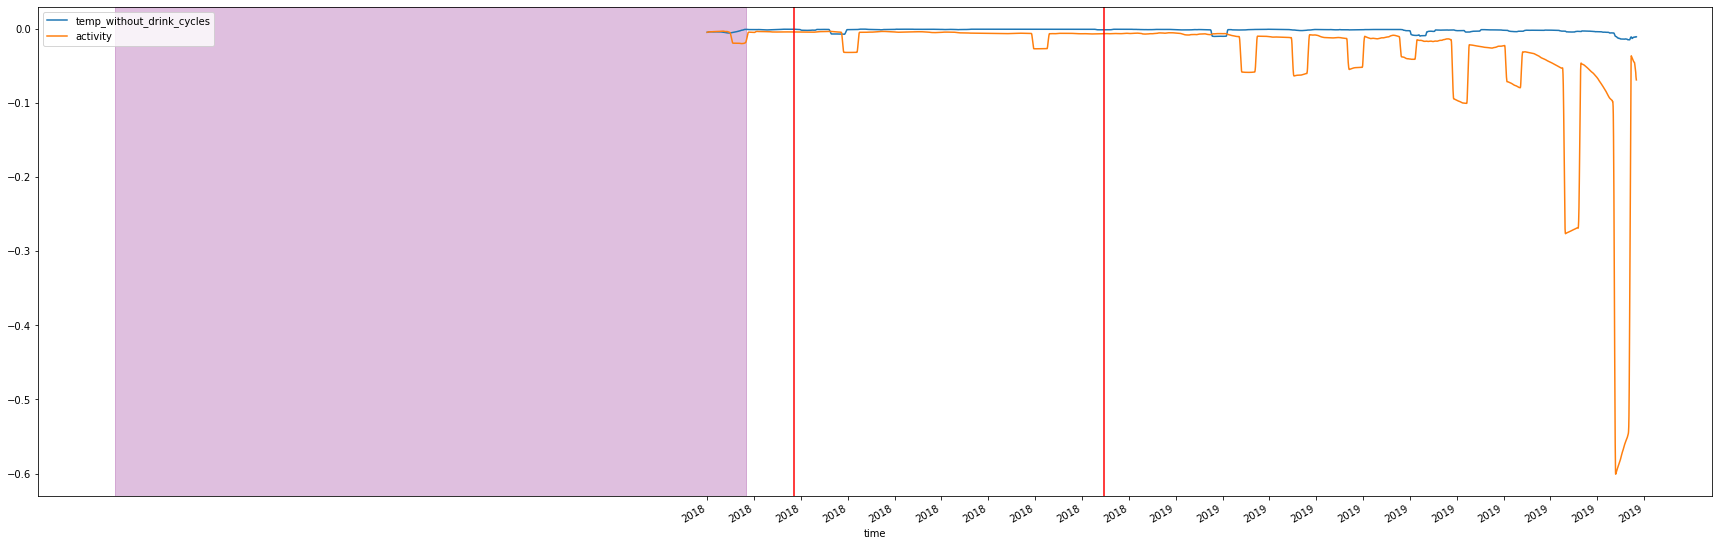

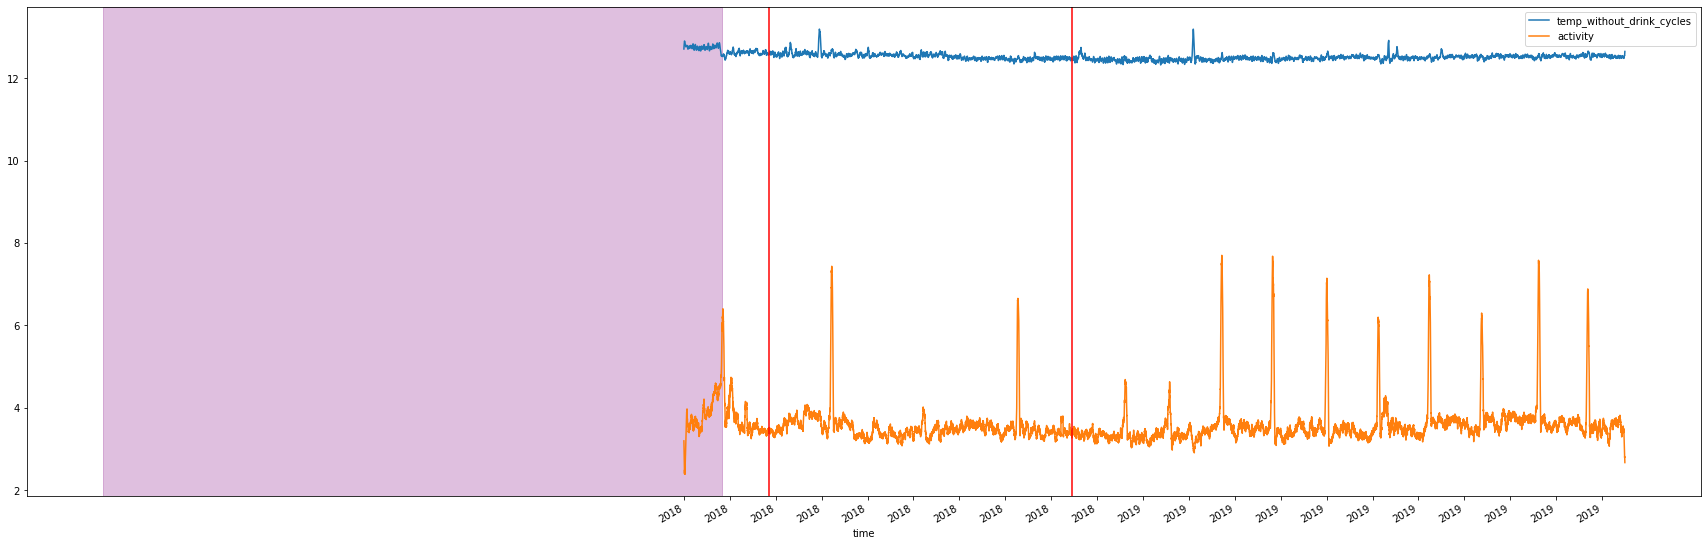

9992


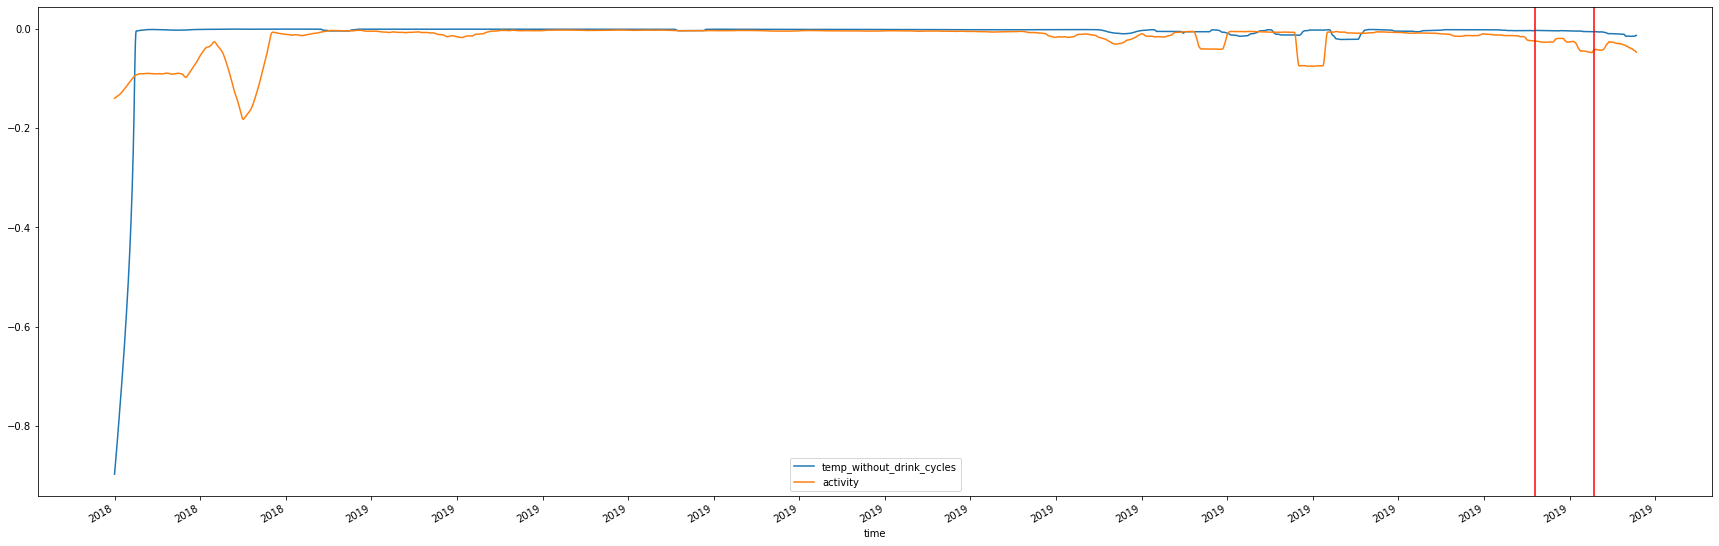

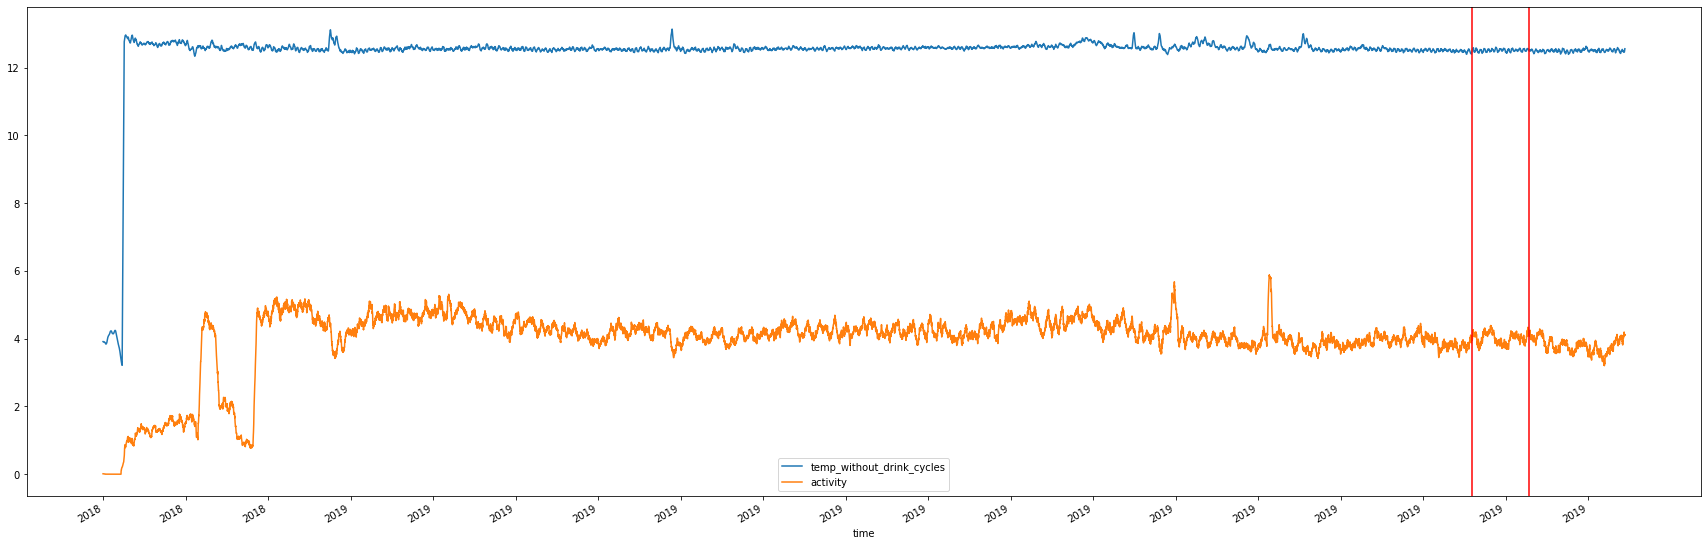

9993


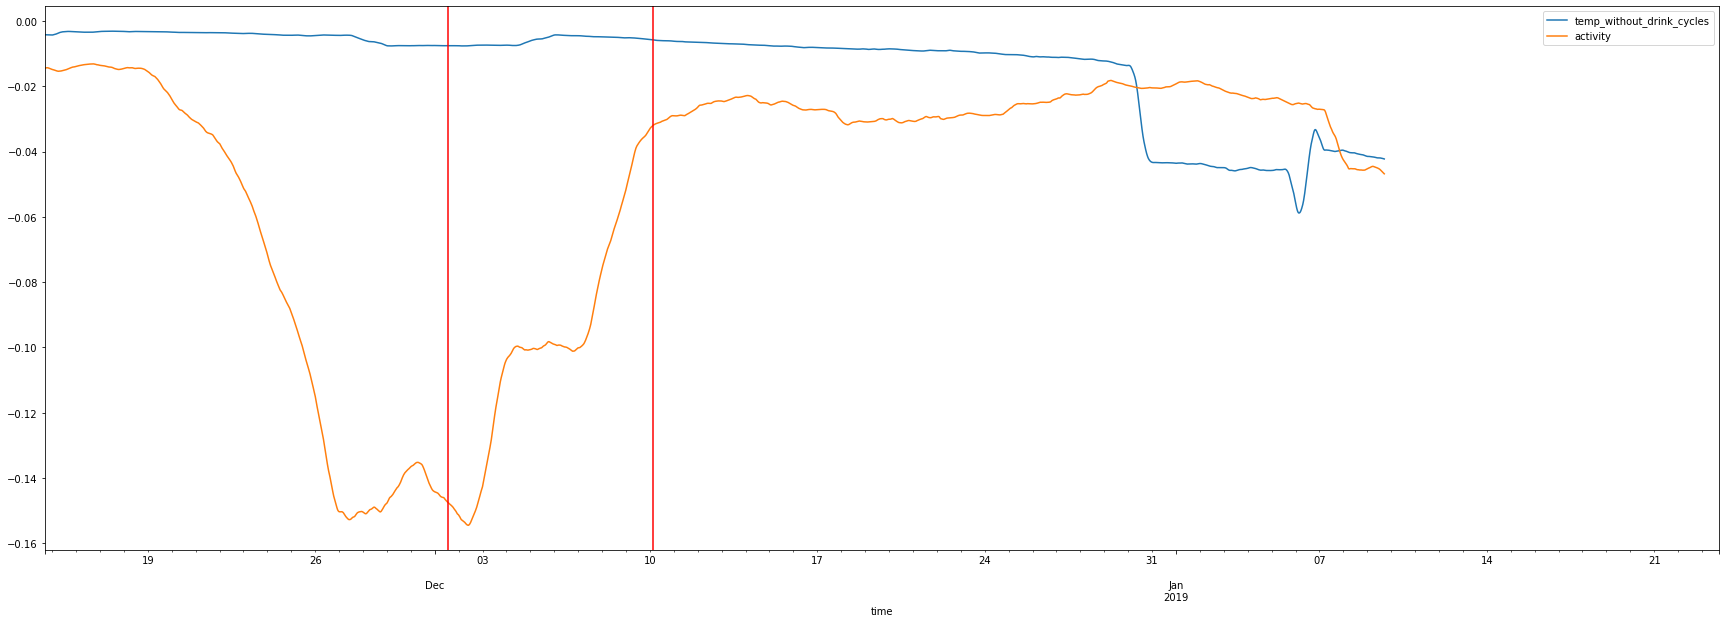

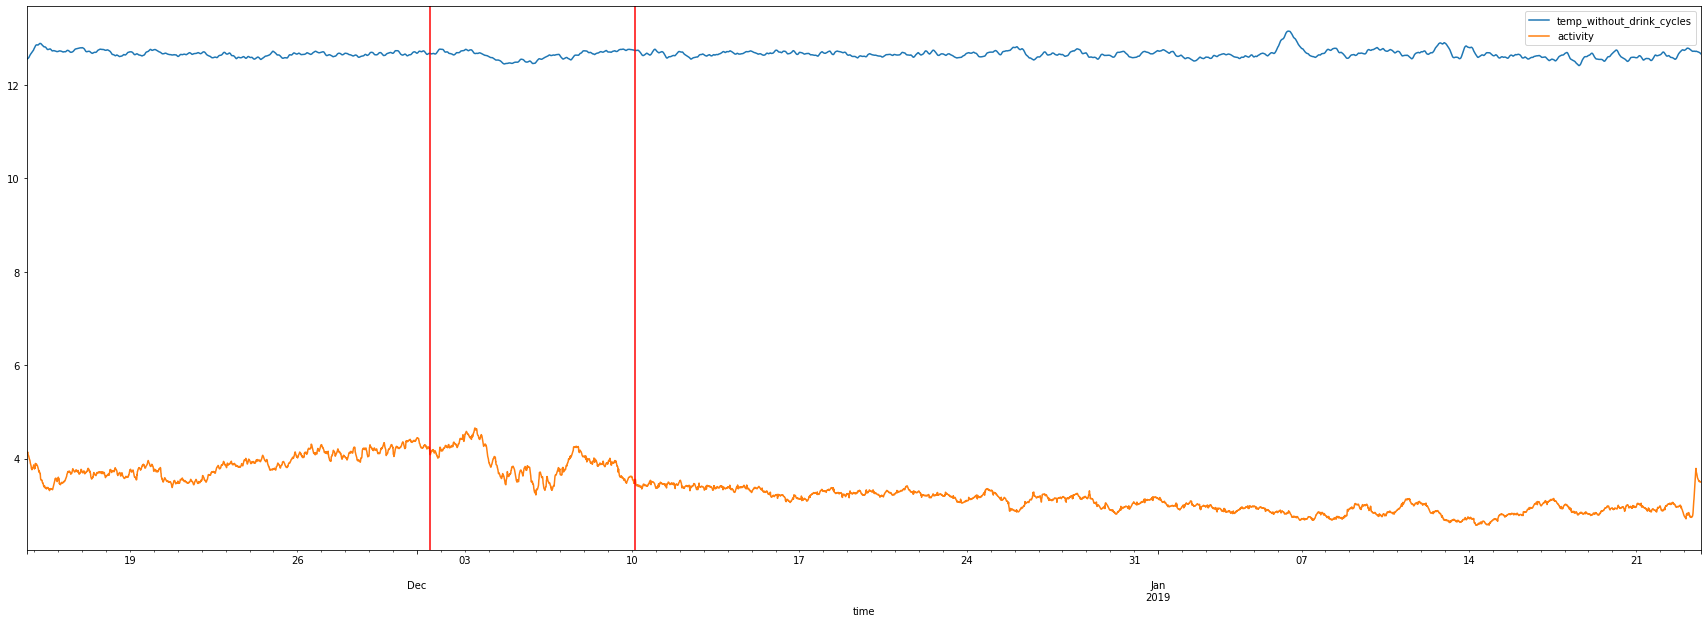

9994


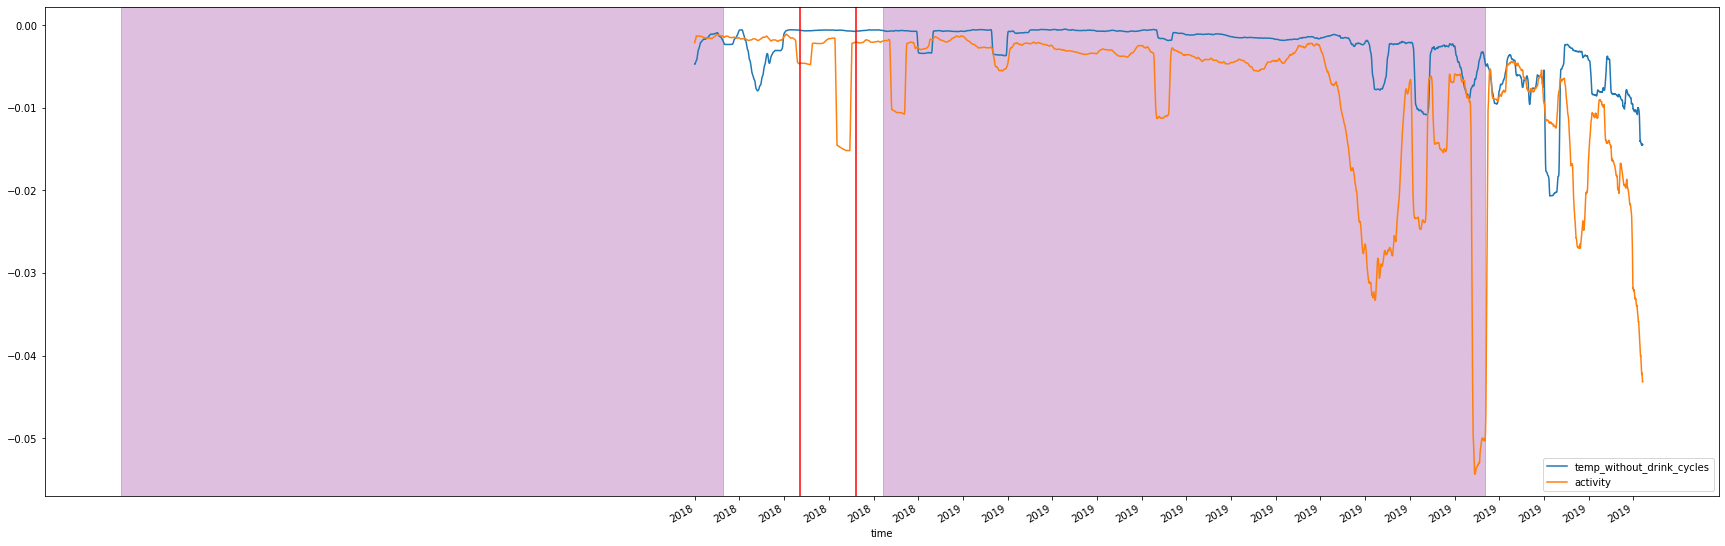

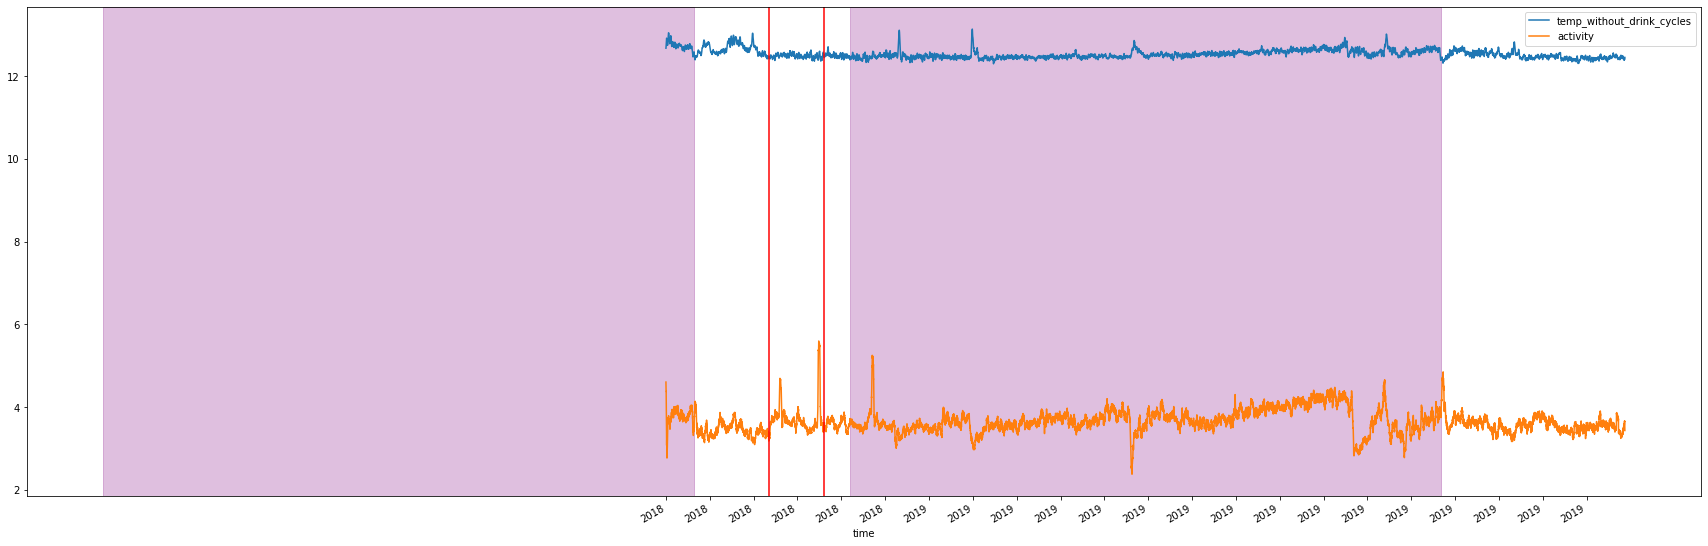

9995


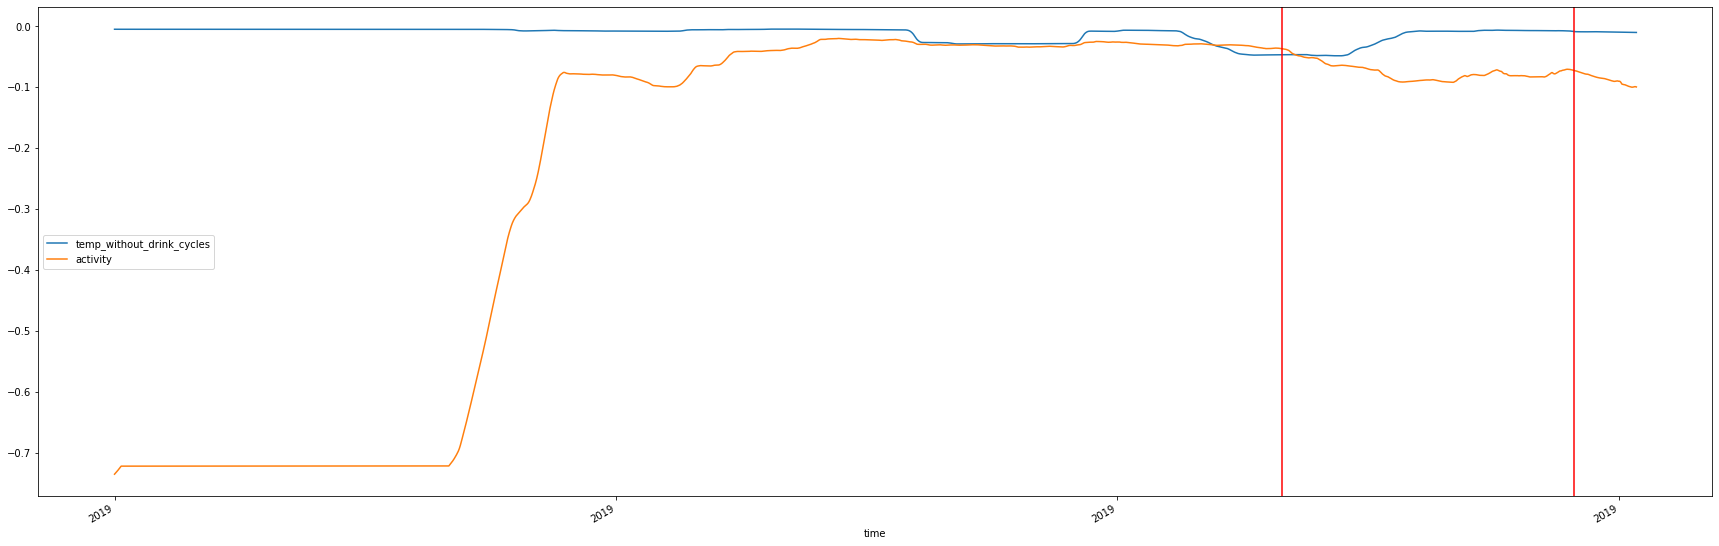

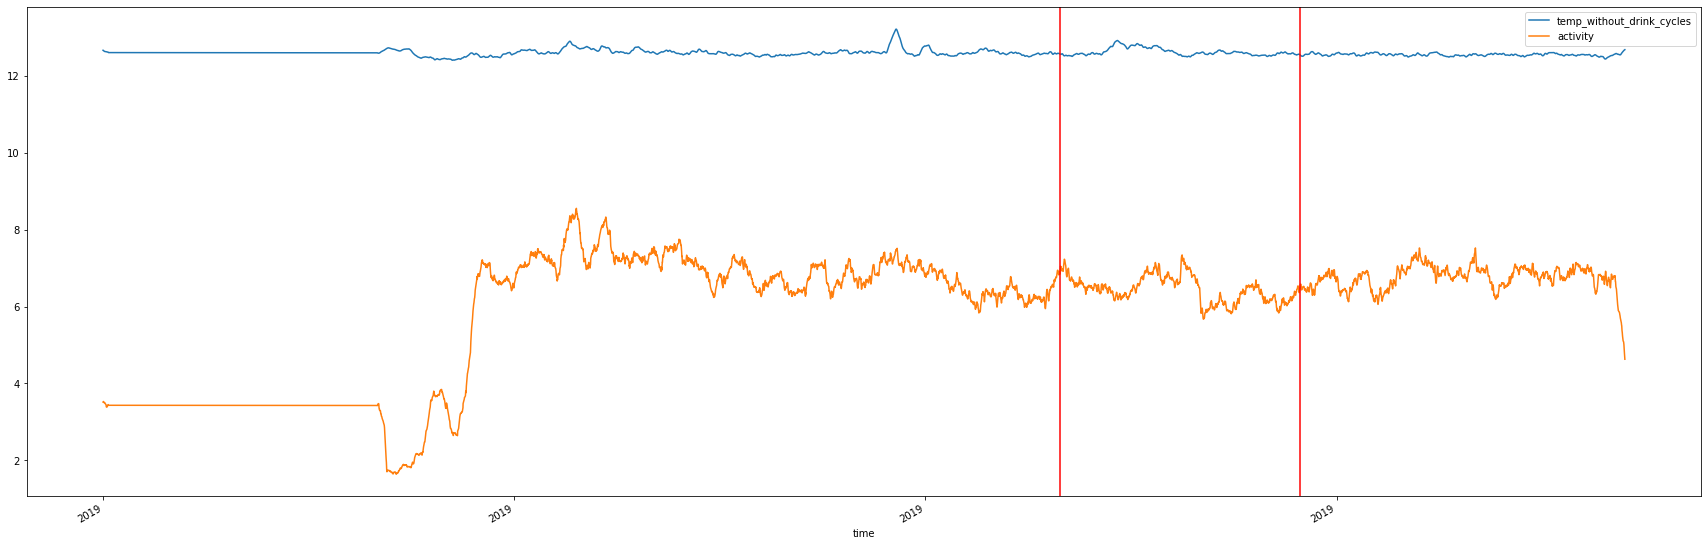

10


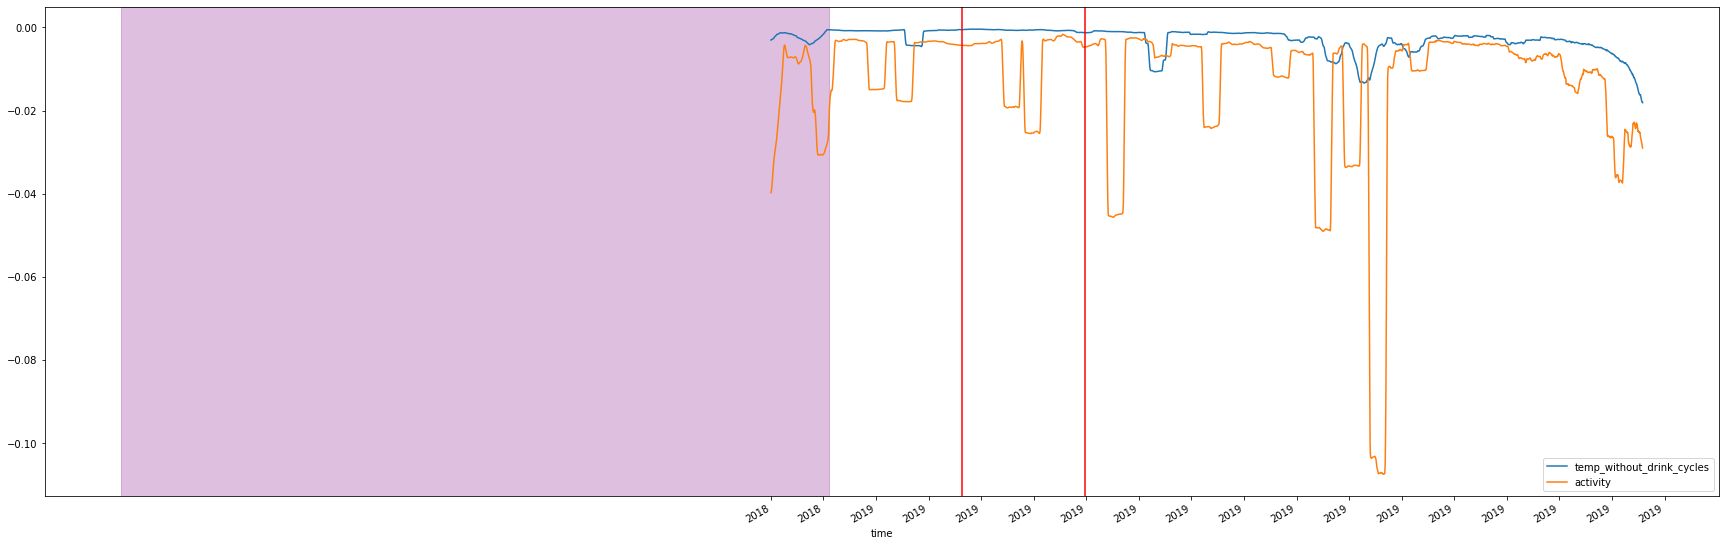

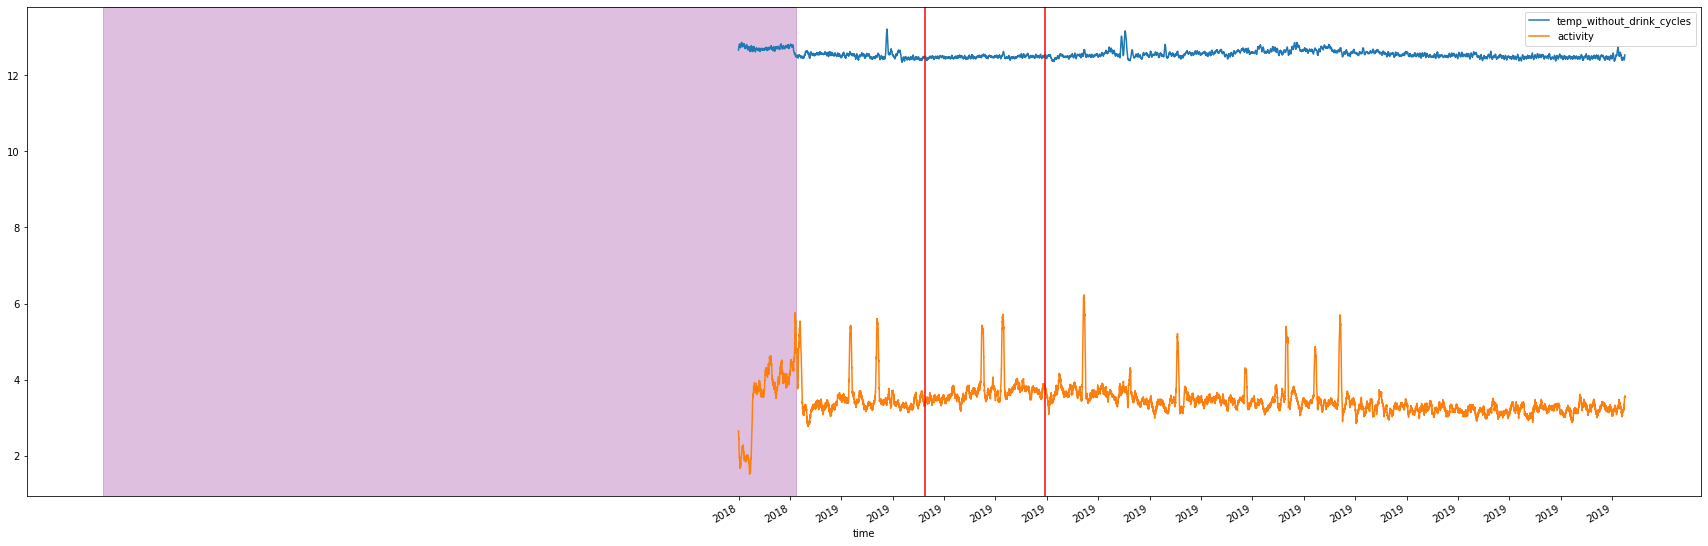

9997


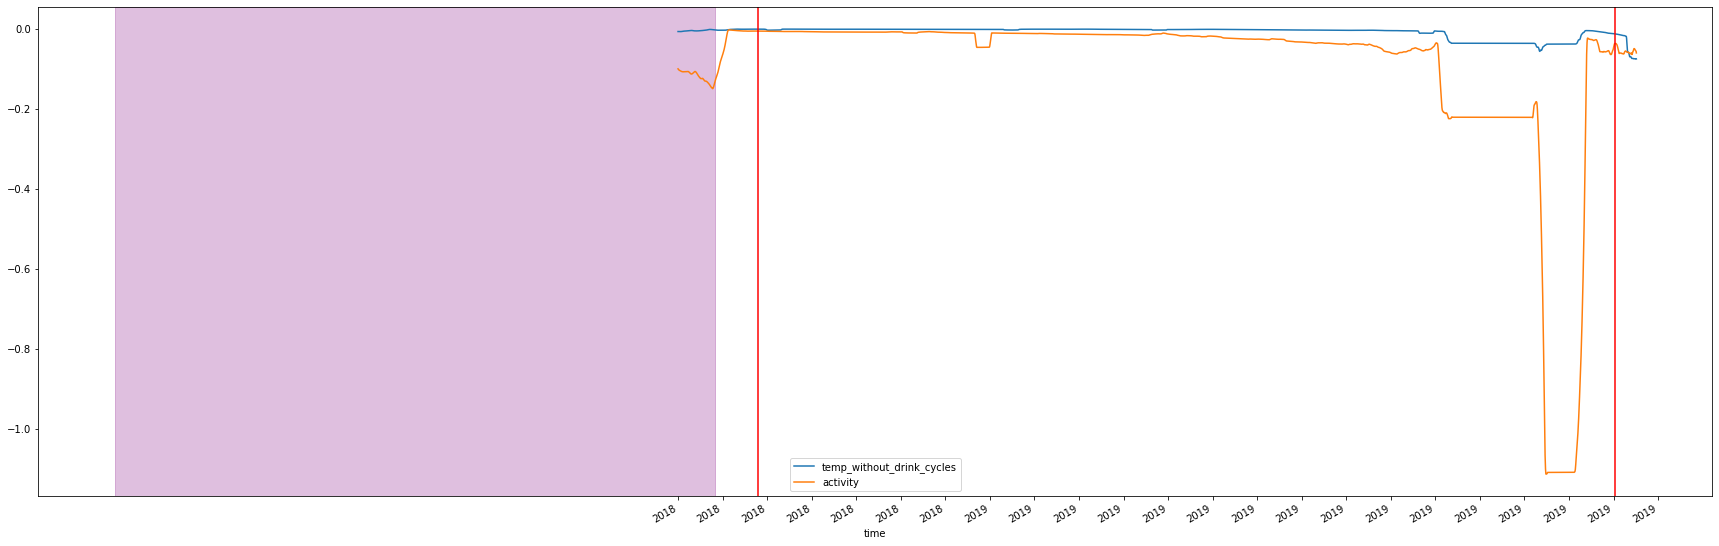

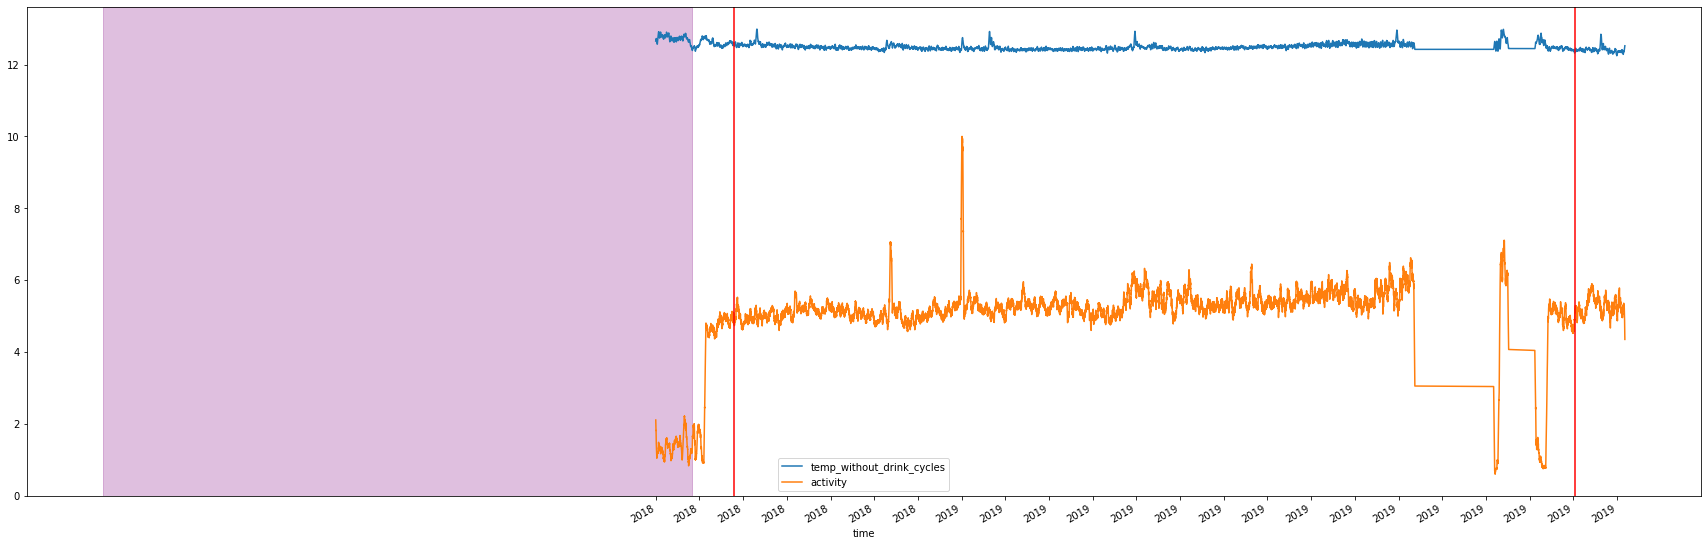

10666


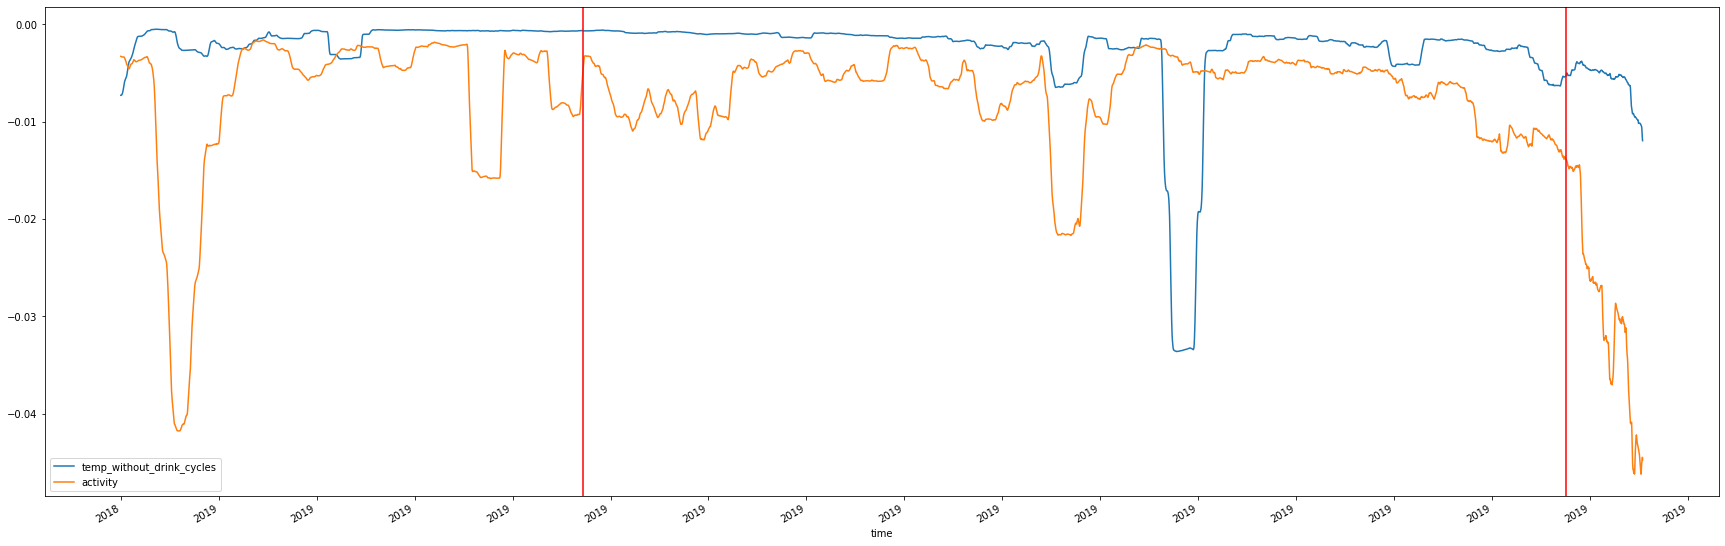

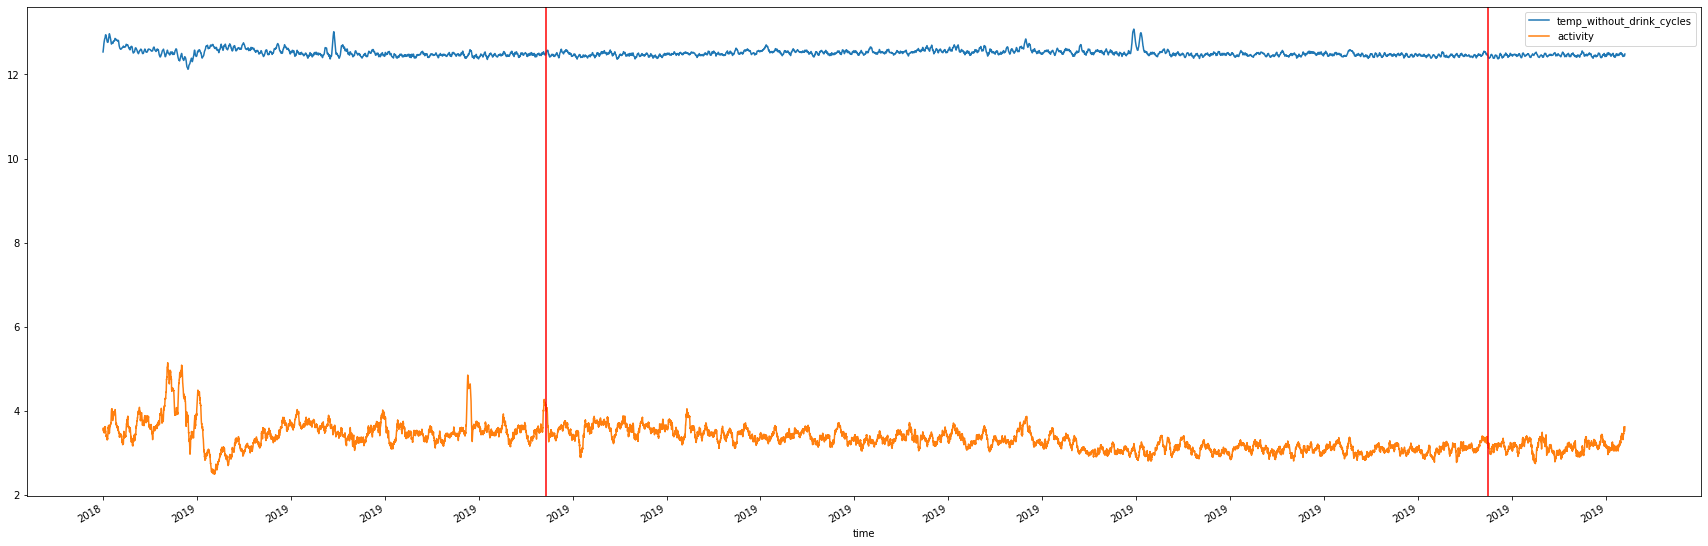

9975


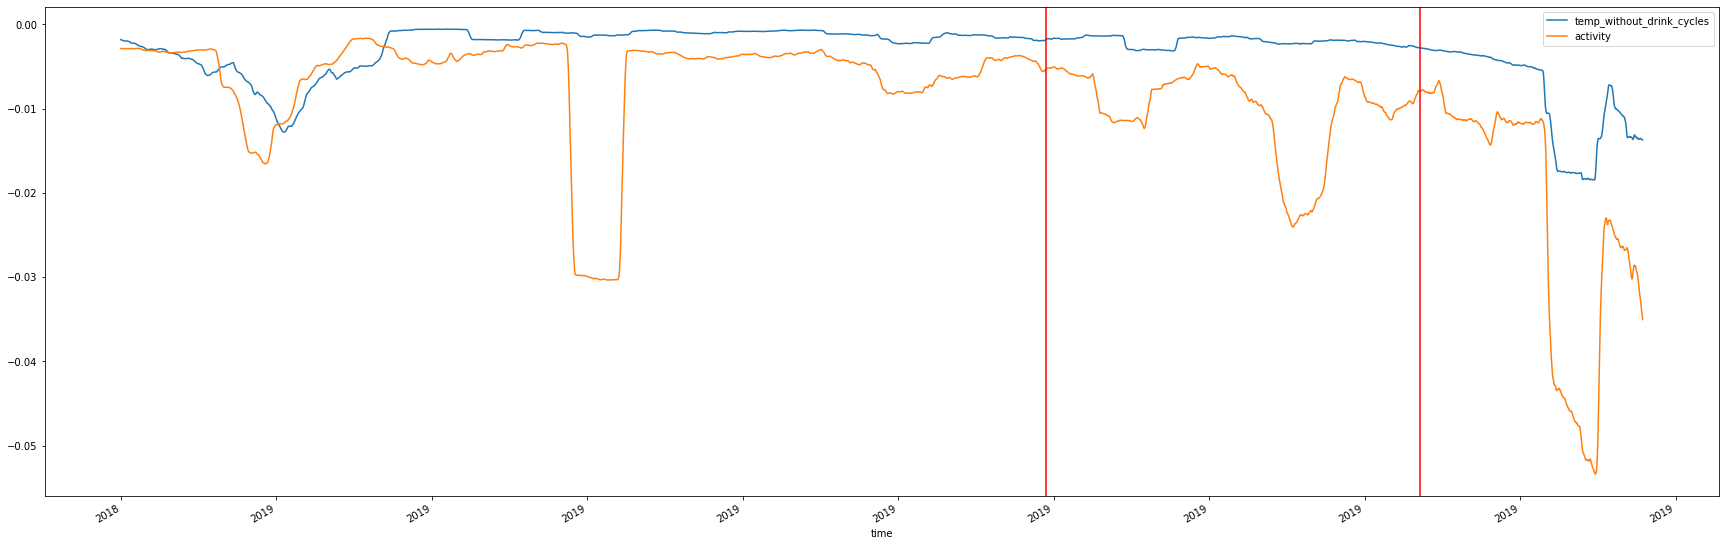

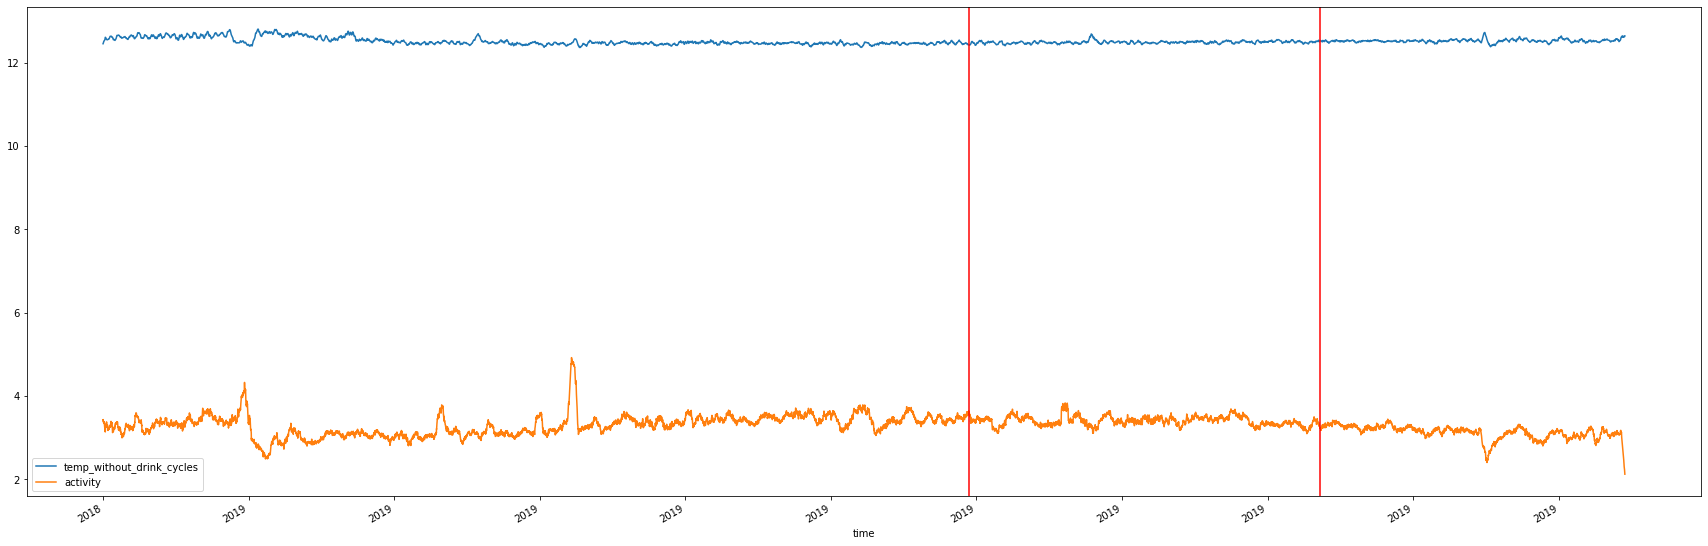

In [200]:
from scipy.signal import find_peaks

for x in cows.keys():
    df = cows[x].copy()[::-1]
    df[['temp_without_drink_cycles', 'activity']] = df[['temp_without_drink_cycles', 'activity']].expanding(min_periods=7*24*6).std() 
    df[['temp_without_drink_cycles', 'activity']] = df[['temp_without_drink_cycles', 'activity']].diff().abs().rolling(7*24*6).sum()
    df[['temp_without_drink_cycles', 'activity']] = -1 * df[['temp_without_drink_cycles', 'activity']]
    
    z, z1 = find_peaks(df['temp_without_drink_cycles'], prominence=(None, None))
    z = z[z1["prominences"].argmax()]
    y, y1 = find_peaks(df['activity'], prominence=(None, None))
    y = y[y1["prominences"].argmax()]

#     if len(df[(df[['temp_without_drink_cycles', 'activity']] < 0.1).all(axis=1)]) > 0:
#         z = df[(df[['temp_without_drink_cycles', 'activity']] < 0.1).all(axis=1)].iloc[-1].time
#     else:
#         z = None
    
    print(x)
    plot(df, x, [z, y])
    plot(cows[x], x, [z, y])

In [ ]:
df = cows[9995].copy()[::-1]
df[['temp_without_drink_cycles', 'activity']] = df[['temp_without_drink_cycles', 'activity']].expanding(min_periods=7*24*6).mean() 
df[['temp_without_drink_cycles', 'activity']] = df[['temp_without_drink_cycles', 'activity']].diff().abs()
print(df[['temp_without_drink_cycles', 'activity']].rolling(7*24*6, min_periods=1).sum())


In [185]:
cows[9995].loc[2203]

index                                       2568
act_heat_index_smart                         NaN
activity                                 7.54218
activity_1day_avg                        7.52804
60percentile_of_5day_temp                332.667
temp_height_index                     -0.0870023
temp_inc_index                                 0
temp_without_drink_cycles                12.6297
time                         2019-10-14 08:27:00
cow_id                                      9995
Name: 2203, dtype: object